# <p style="text-align:center;">Logistic Regression from Scratch</p>
---
*<p style="text-align:right;">Reference: Machine Learning by Andrew Ng.</p>*


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn import datasets

## Assumptions for Logistic Regression
- **Appropriate Outcome Type** : It assumes that there is an appropriate structure of the output label. So the type of logistic regression utilized (binary, multinomial, or ordinal) must match the outcome (dependent) variable in the dataset.

- **Absence of multi-collinearity** : Multicollinearity corresponds to a situation where the data contain highly correlated independent variables. This is a problem because it reduces the precision of the estimated coefficients, which weakens the statistical power of the logistic regression model.

- **Independence of observations** : The observations must be independent of each other, i.e., they should not come from repeated or paired data. This means that each observation is not influenced by or related to the rest of the observations.

- **Sufficiently large sample size** : There should be an adequate number of observations for each independent variable in the dataset to avoid creating an overfit model. One rule of thumb is that there should be at least 10 observations with the least frequent outcome for each independent variable. We can check this by retrieving the `value_counts` for each variable.

- **Linearity of independent variables and log-odds** : Logistic regression does not require a linear relationship between the dependent and independent variables. However, it still needs independent variables to be linearly related to the log-odds of the outcome.

## The UCI ML Wine Dataset

The data is the results of a chemical analysis of wines grown in the same region in Italy by three different cultivators. There are thirteen different measurements taken for different constituents found in the three types of wine.

- Number of Instances : 178 (50 in each of three classes)

- Number of Attributes : 13 numeric, predictive attributes and the class

- Attribute Information
    * Alcohol
    * Malic acid
    * Ash
    * Alcalinity of ash
    * Magnesium
    * Total phenols
    * Flavanoids
    * Nonflavanoid phenols
    * Proanthocyanins
    * Color intensity
    * Hue
    * OD280/OD315 of diluted wines
    * Proline


- Class
    * class_0
    * class_1
    * class_2

In [3]:
X,y = datasets.load_wine(return_X_y = True, as_frame = True)

## Visualization

In [4]:
df = pd.concat([X,y], axis = 1)
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [5]:
df.tail()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.7,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.3,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.2,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.3,0.60,1.62,840.0,2
177,14.13,4.10,2.74,24.5,96.0,2.05,0.76,0.56,1.35,9.2,0.61,1.60,560.0,2


In [6]:
print("Shape of X: " + str(X.shape))
print("Shape of Y: " + str(y.shape))

Shape of X: (178, 13)
Shape of Y: (178,)


### Target Column Distribution

In [7]:
df['target'].value_counts()

1    71
0    59
2    48
Name: target, dtype: int64

<AxesSubplot:xlabel='target', ylabel='count'>

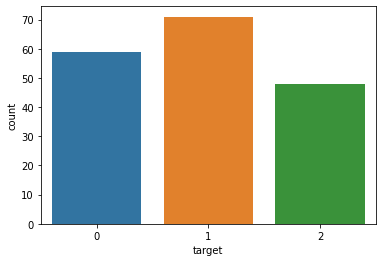

In [8]:
sns.countplot(x = 'target', data = df)

In [9]:
df.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


Outlier features are alcalinity_of_ash, magnesium, color_intensityand proline which've been deduced upon comparing mean and max value of the features. Now we will plot the correlation matrix heatmap. While constructing the correlation matrix a thing that we can do is to include the dependent variable ‘SalePrice’ here as well. This is because it is a method for us when we try to select the independent variables to be included in the model. When clueless about which variables to include in the model, just do a correlation matrix and select those independent variables with high correlation with dependent variable. But the target variable here is class/discrete output not continuous. Hence its no use to include the target variable.

In [10]:
np.random.seed(42)

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 42)

In [12]:
X_train.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
138,13.49,3.59,2.19,19.5,88.0,1.62,0.48,0.58,0.88,5.70,0.81,1.82,580.0
104,12.51,1.73,1.98,20.5,85.0,2.20,1.92,0.32,1.48,2.94,1.04,3.57,672.0
78,12.33,0.99,1.95,14.8,136.0,1.90,1.85,0.35,2.76,3.40,1.06,2.31,750.0
36,13.28,1.64,2.84,15.5,110.0,2.60,2.68,0.34,1.36,4.60,1.09,2.78,880.0
93,12.29,2.83,2.22,18.0,88.0,2.45,2.25,0.25,1.99,2.15,1.15,3.30,290.0


In [13]:
y_train.head()

138    2
104    1
78     1
36     0
93     1
Name: target, dtype: int32

In [14]:
#drop ensures old idx wont be included in dataset, 
#inplace modifies the org. dataframe, doesnt generates new copy instead
X_train.reset_index(drop = True, inplace = True); 
y_train.reset_index(drop = True, inplace = True);
X_test.reset_index(drop = True, inplace = True);
y_test.reset_index(drop = True, inplace = True);

In [15]:
X_train

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,13.49,3.59,2.19,19.5,88.0,1.62,0.48,0.58,0.88,5.70,0.81,1.82,580.0
1,12.51,1.73,1.98,20.5,85.0,2.20,1.92,0.32,1.48,2.94,1.04,3.57,672.0
2,12.33,0.99,1.95,14.8,136.0,1.90,1.85,0.35,2.76,3.40,1.06,2.31,750.0
3,13.28,1.64,2.84,15.5,110.0,2.60,2.68,0.34,1.36,4.60,1.09,2.78,880.0
4,12.29,2.83,2.22,18.0,88.0,2.45,2.25,0.25,1.99,2.15,1.15,3.30,290.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
119,13.86,1.51,2.67,25.0,86.0,2.95,2.86,0.21,1.87,3.38,1.36,3.16,410.0
120,12.25,1.73,2.12,19.0,80.0,1.65,2.03,0.37,1.63,3.40,1.00,3.17,510.0
121,14.38,1.87,2.38,12.0,102.0,3.30,3.64,0.29,2.96,7.50,1.20,3.00,1547.0
122,12.69,1.53,2.26,20.7,80.0,1.38,1.46,0.58,1.62,3.05,0.96,2.06,495.0


In [16]:
y_train

0      2
1      1
2      1
3      0
4      1
      ..
119    1
120    1
121    0
122    1
123    1
Name: target, Length: 124, dtype: int32

In [17]:
print("Shape of X_train:", X_train.shape, "Shape of y_train: ", y_train.shape)
print("Shape of X_test:", X_test.shape, "Shape of y_test: ", y_test.shape)

Shape of X_train: (124, 13) Shape of y_train:  (124,)
Shape of X_test: (54, 13) Shape of y_test:  (54,)


### Boxplots

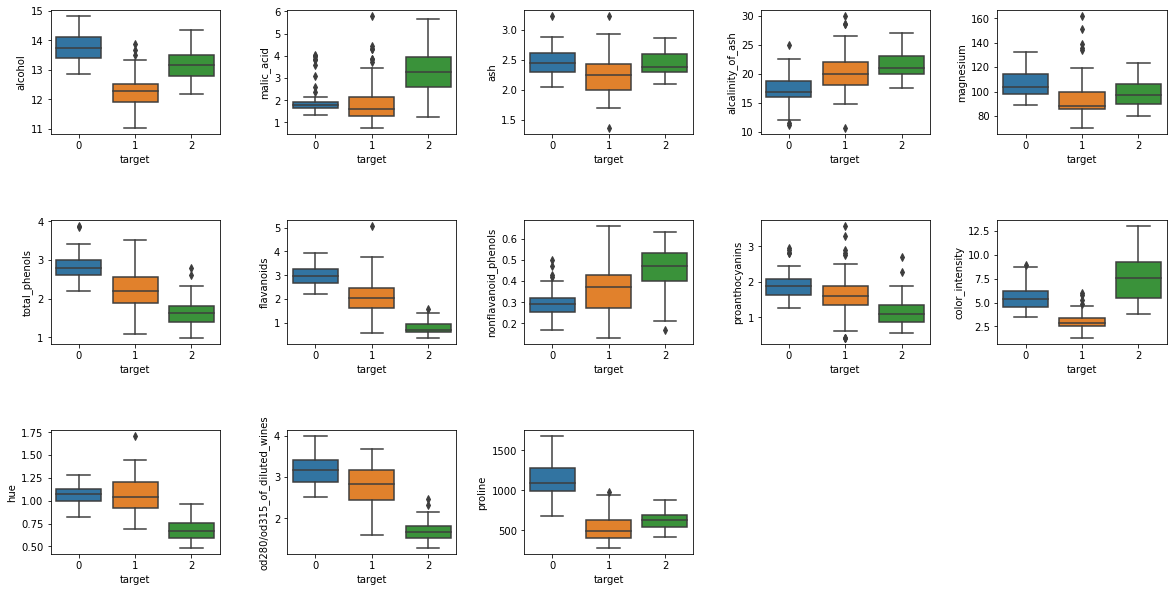

In [18]:
plt.figure(figsize = (20,10))
for i in range(len(X_train.columns)):
     plt.subplot(3, 5, i+1)
     sns.boxplot(x = 'target', y = X_train.columns[i], data = df)
plt.subplots_adjust(hspace=0.7, wspace=0.4)

For the alcohol feature - 
- Min vlaue of Dataset lies in  Class 1 is somewhere around 11
- Max vlaue of Dataset lies in  Class 0 is somewhere below 15

which can be also inferred from:

In [19]:
df['alcohol'].describe()

count    178.000000
mean      13.000618
std        0.811827
min       11.030000
25%       12.362500
50%       13.050000
75%       13.677500
max       14.830000
Name: alcohol, dtype: float64

### Distribution plots

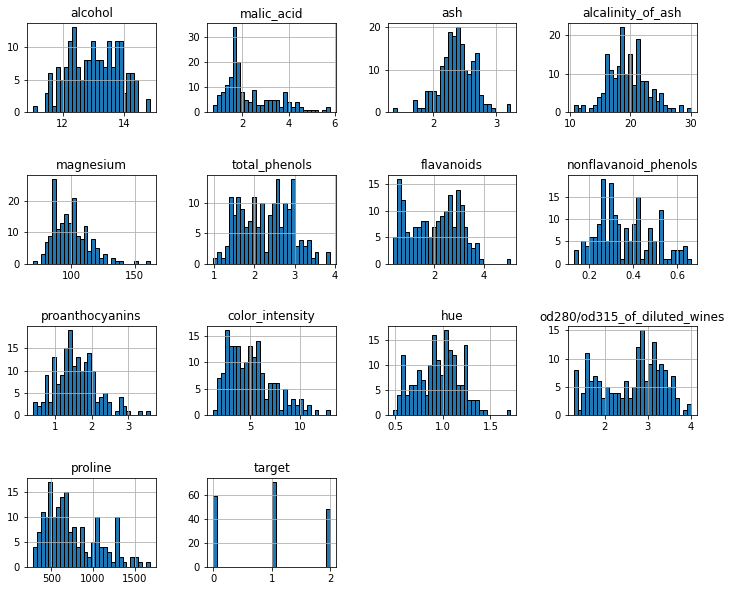

In [20]:
df.hist(figsize=(12, 10), bins=30, edgecolor="black")
plt.subplots_adjust(hspace=0.7, wspace=0.4)

The skewness and kurtosis of all variables are:

In [21]:
sk = pd.DataFrame()
for i in range(len(X_train.columns)):
    sk.at[i, 'Feature'] = X_train.columns[i]
    sk.at[i, 'Skewness'] = np.round(df[df.columns[i]].skew(), 2)
    sk.at[i, 'Kurtosis'] = np.round(df[df.columns[i]].kurt(), 2)

In [22]:
sk

,Feature,Skewness,Kurtosis
0,alcohol,-0.05,-0.85
1,malic_acid,1.04,0.30
2,ash,-0.18,1.14
3,alcalinity_of_ash,0.21,0.49
4,magnesium,1.10,2.10
5,total_phenols,0.09,-0.84
6,flavanoids,0.03,-0.88
7,nonflavanoid_phenols,0.45,-0.64
8,proanthocyanins,0.52,0.55
9,color_intensity,0.87,0.38


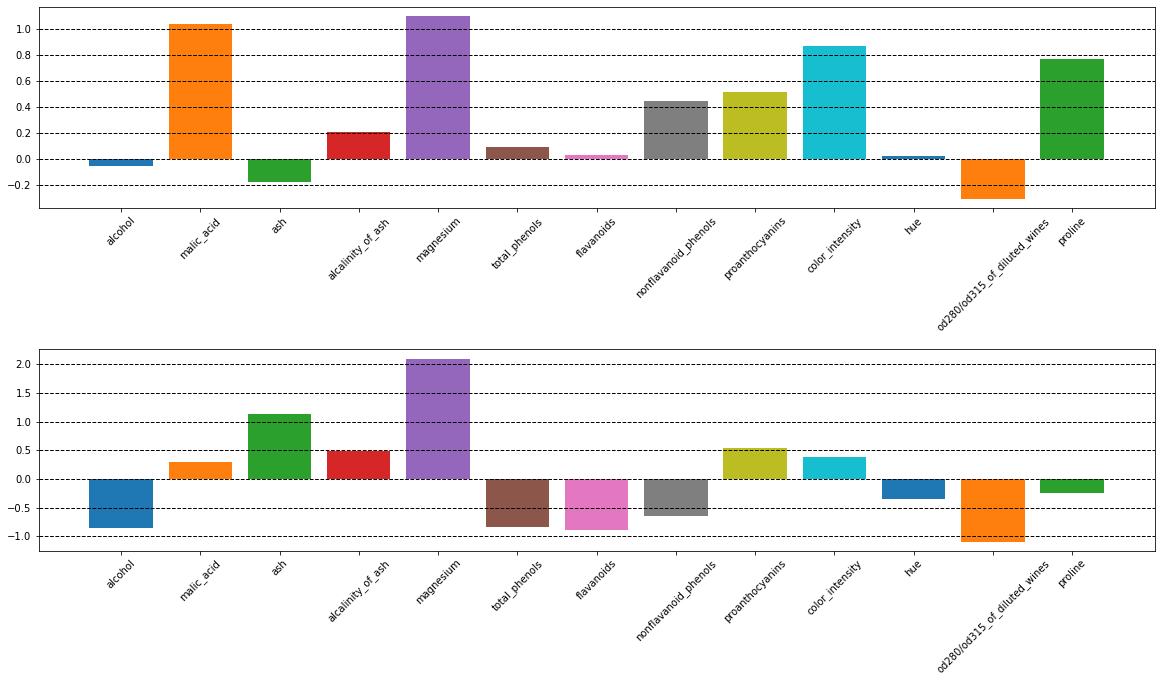

In [23]:
plt.figure(figsize = (20,10))

plt.subplot(2,1,1)
for i in range(len(sk)):
    plt.bar(x = sk.at[i,'Feature'], height = sk.at[i, 'Skewness'])
    plt.xticks(rotation = 45)
plt.grid(axis = 'y', c = 'k', ls = '--', lw = 1)

plt.subplot(2,1,2)
for i in range(len(sk)):
    plt.bar(x = sk.at[i,'Feature'], height = sk.at[i, 'Kurtosis'])
    plt.xticks(rotation = 45)
plt.grid(axis = 'y', c = 'k', ls = '--', lw = 1)

plt.subplots_adjust(hspace = 0.7)

## Feature Engineering

<AxesSubplot:>

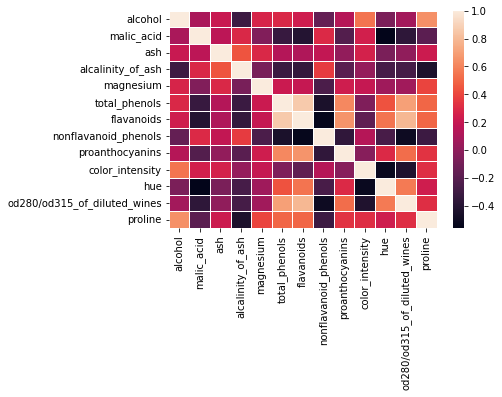

In [24]:
correlation_matrix = X.corr()
sns.heatmap(correlation_matrix, annot = False, linewidth = .5)

In [25]:
correlation_matrix

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
alcohol,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720
malic_acid,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011
ash,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626
alcalinity_of_ash,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597
magnesium,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351
total_phenols,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115
flavanoids,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193
nonflavanoid_phenols,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385
proanthocyanins,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417
color_intensity,0.546364,0.248985,0.258887,0.018732,0.199950,-0.055136,-0.172379,0.139057,-0.025250,1.000000,-0.521813,-0.428815,0.316100


In [26]:
cm = correlation_matrix.ge(0.6)
cm

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
alcohol,True,False,False,False,False,False,False,False,False,False,False,False,True
malic_acid,False,True,False,False,False,False,False,False,False,False,False,False,False
ash,False,False,True,False,False,False,False,False,False,False,False,False,False
alcalinity_of_ash,False,False,False,True,False,False,False,False,False,False,False,False,False
magnesium,False,False,False,False,True,False,False,False,False,False,False,False,False
total_phenols,False,False,False,False,False,True,True,False,True,False,False,True,False
flavanoids,False,False,False,False,False,True,True,False,True,False,False,True,False
nonflavanoid_phenols,False,False,False,False,False,False,False,True,False,False,False,False,False
proanthocyanins,False,False,False,False,False,True,True,False,True,False,False,False,False
color_intensity,False,False,False,False,False,False,False,False,False,True,False,False,False


Features that have collinearity>0.6 are as below:

In [27]:
cf = pd.DataFrame()
for i in range(len(cm.index)):
    for j in range(len(cm.columns)):
        if( (cm.at[ cm.index[i] , cm.columns[j] ]==True) & (cm.index[i]!=cm.columns[j]) ):
            cf.at[i, 'Feature_1'] = cm.index[i]
            cf.at[i, 'Feature_2'] = cm.columns[j]
            cf.at[i, 'Correlation'] = np.round(correlation_matrix.at[cm.index[i] , cm.columns[j]],2)

In [28]:
cf

,Feature_1,Feature_2,Correlation
0,alcohol,proline,0.64
5,total_phenols,od280/od315_of_diluted_wines,0.70
6,flavanoids,od280/od315_of_diluted_wines,0.79
8,proanthocyanins,flavanoids,0.65
11,od280/od315_of_diluted_wines,flavanoids,0.79
12,proline,alcohol,0.64


We can drop the 'total_phenol' feature since its correlated to 3 other features. Similarly we can drop 'flavanoids' feature as well. We can also see the variance inflation factor of the independent variables to select the necessary features. 

Variance inflation factor (VIF) is a measure of the amount of multicollinearity in a set of multiple regression variables. Mathematically, the VIF for a regression model variable is equal to the ratio of the overall model variance to the variance of a model that includes only that single independent variable. 

In [29]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["features"] = X.columns
vif["vif_Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif

,features,vif_Factor
0,alcohol,206.189057
1,malic_acid,8.925541
2,ash,165.640370
3,alcalinity_of_ash,73.141564
4,magnesium,67.364868
5,total_phenols,62.786935
6,flavanoids,35.535602
7,nonflavanoid_phenols,16.636708
8,proanthocyanins,17.115665
9,color_intensity,17.022272


If the VIF value is higher than 10, it is usually considered to have a high correlation with other independent variables. However, the acceptance range is subject to requirements and constraints. From the results, we can see that most features are highly correlated with other independent variables and only 1 feature, 'malic_acid' can pass the below 10 threshold.

In [30]:
X_train = X_train.drop(['total_phenols','flavanoids' ], axis = 1)

In [31]:
X_test = X_test.drop(['total_phenols','flavanoids' ], axis = 1)

In [32]:
X_train.head(3)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,13.49,3.59,2.19,19.5,88.0,0.58,0.88,5.70,0.81,1.82,580.0
1,12.51,1.73,1.98,20.5,85.0,0.32,1.48,2.94,1.04,3.57,672.0
2,12.33,0.99,1.95,14.8,136.0,0.35,2.76,3.40,1.06,2.31,750.0


Constructing the VIF Table again after deleting the features we get:

In [33]:
vif = pd.DataFrame()
vif["features"] = X_train.columns
vif["vif_Factor"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif

,features,vif_Factor
0,alcohol,176.055840
1,malic_acid,10.367581
2,ash,154.003676
3,alcalinity_of_ash,64.816107
4,magnesium,59.490240
5,nonflavanoid_phenols,14.725340
6,proanthocyanins,14.726721
7,color_intensity,17.555055
8,hue,43.325719
9,od280/od315_of_diluted_wines,36.782769


We can see that using simple elimination, we are able to reduce the VIF value significantly while keeping the important variables. However, the variables still have high VIF value and they are important in predicting housing price. How? Sometimes we can use small tricks as described below to transform the variable.

In [34]:
print("Min , Max of ash: ", X_train['ash'].min(), " , " , X_train['ash'].max())
print("Min , Max of alcalinity_of_ash: ", X_train['alcalinity_of_ash'].min(), " , " , X_train['alcalinity_of_ash'].max())

Min , Max of ash:  1.36  ,  3.23
Min , Max of alcalinity_of_ash:  10.6  ,  30.0


Either we can transform these variables seperately or combine them to a single variable.

In [35]:
ash_train = pd.Series(np.abs(X_train['alcalinity_of_ash'] - X_train['ash']))
ash_train[0:3]

0    17.31
1    18.52
2    12.85
dtype: float64

In [36]:
X_train['ash_alk'] = ash_train
X_train = X_train.drop(['ash','alcalinity_of_ash'], axis = 1)
X_train.head(3)

,alcohol,malic_acid,magnesium,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,ash_alk
0,13.49,3.59,88.0,0.58,0.88,5.70,0.81,1.82,580.0,17.31
1,12.51,1.73,85.0,0.32,1.48,2.94,1.04,3.57,672.0,18.52
2,12.33,0.99,136.0,0.35,2.76,3.40,1.06,2.31,750.0,12.85


In [37]:
df_train = pd.concat([X_train, y_train], axis = 1)

In [38]:
df_train.head(3)

,alcohol,malic_acid,magnesium,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,ash_alk,target
0,13.49,3.59,88.0,0.58,0.88,5.70,0.81,1.82,580.0,17.31,2
1,12.51,1.73,85.0,0.32,1.48,2.94,1.04,3.57,672.0,18.52,1
2,12.33,0.99,136.0,0.35,2.76,3.40,1.06,2.31,750.0,12.85,1


In [39]:
ash_test = pd.Series(np.abs(X_test['alcalinity_of_ash'] - X_test['ash']))
ash_test[0:3]

0    12.64
1    16.46
2    18.30
dtype: float64

In [40]:
X_test['ash_alk'] = ash_test
X_test = X_test.drop(['ash','alcalinity_of_ash'], axis = 1)
X_test.head(3)

,alcohol,malic_acid,magnesium,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,ash_alk
0,13.64,3.10,116.0,0.17,1.66,5.10,0.96,3.36,845.0,12.64
1,14.21,4.04,111.0,0.30,1.25,5.24,0.87,3.33,1080.0,16.46
2,12.93,2.81,96.0,0.53,0.75,4.60,0.77,2.31,600.0,18.30


In [41]:
df_test = pd.concat([X_test, y_test], axis = 1)

In [42]:
df_test.head(3)

,alcohol,malic_acid,magnesium,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,ash_alk,target
0,13.64,3.10,116.0,0.17,1.66,5.10,0.96,3.36,845.0,12.64,0
1,14.21,4.04,111.0,0.30,1.25,5.24,0.87,3.33,1080.0,16.46,0
2,12.93,2.81,96.0,0.53,0.75,4.60,0.77,2.31,600.0,18.30,2


<AxesSubplot:>

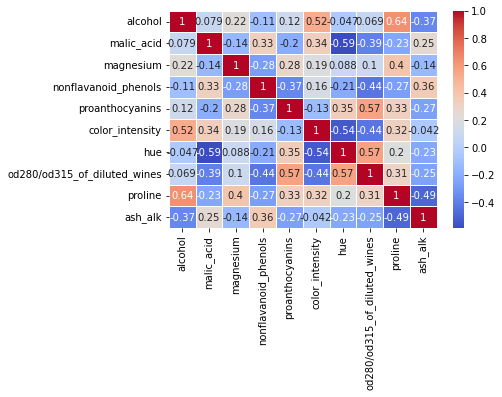

In [43]:
cm_train = X_train.corr()
sns.heatmap(cm_train, annot = True, lw = 0.5, cmap = 'coolwarm')

In [44]:
vif = pd.DataFrame()
vif["features"] = X_train.columns
vif["vif_Factor"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif

,features,vif_Factor
0,alcohol,172.233913
1,malic_acid,10.268520
2,magnesium,54.585024
3,nonflavanoid_phenols,13.996128
4,proanthocyanins,14.326509
5,color_intensity,17.104018
6,hue,43.056292
7,od280/od315_of_diluted_wines,34.208976
8,proline,16.241076
9,ash_alk,35.953839


Initially 'ash' and 'alcalinity_of_ash' had VIF 154 and 64.81. Now the combined feature ash_alk has a reduced $ VIF \approx 36 $

---
# From Scratch

## Hypothesis

We could approach the classification problem ignoring the fact that $y$ is discrete-valued, and use our old linear regression algorithm to try to predict $ y $ given $ x $. However, it is easy to construct examples where this method performs very poorly. Intuitively, it also doesn’t make sense for $ h_\theta (x) $ to take values larger than $1$ or smaller than $0$ when we know that $y \in {0,1}$. To fix this, let’s change the form for our hypotheses $ h_\theta (x) $ to look like $ 0 \le h_\theta (x) \le 1 $. This is accomplished by plugging $\theta^Tx$ into the Logistic Function.
Our new form uses the "Sigmoid Function," also called the "Logistic Function":

<center>$\large h_\theta (x) = \theta^Tx$</center>
<br>
<center>$\large z = \theta^Tx$</center>
<br>
<center>$\large g(z) = \frac{1}{1 + e^{-z}}$</center>

where 
* $g(z)$ is the output of the logistic regression model for a particular example. 
* $z = b + w_1x_1 + w_2x_2 + w_3x_x + ... w_nx_n$
    - The $w$ values are the learned model weights and $b$ is the bias
    - The $x$ values are the featuure values for a particular example.

**Note that $z$ is also reffered to as log-odds because the inverse of sigmoid states that $z$ can be defined as the probability of $1$ label divided by the probability of $0$ label**:
$$
\large odds = \frac{y}{1-y} \\
\large logOdds, z = log(\frac{y}{1-y}) = b + \vec w  \ \vec x \\
Solving \ for \ p \ gives, \  \large p(x;b,w) = \frac {1}{1 + e^{-(b + \vec w  \ \vec x})}
$$

This is also known as *logistic/logit transformation*. So logistic regression gives us a linear classifier. The decision boundary separating the two predicted classes is the solution of b + w · x = 0, which is a point if x is one dimensional, a line if it is two dimensional, etc.


<center><br><br> 
    $ \large X_{train} = \begin{bmatrix} \longleftarrow x^{(0)} \longrightarrow \\ \longleftarrow x^{(1)} \longrightarrow \\ \longleftarrow x^{(2)} \longrightarrow \\ \vdots \\ \longleftarrow x^{(123)} \longrightarrow \end{bmatrix} $ 
    $ \large y_{train} = \begin{bmatrix}y^{(0)} \\ y^{(1)} \\ y^{(2)} \\ \vdots \\ y^{(123)} \end{bmatrix} $ 
    $ \large H_{train} = \begin{bmatrix}h(x^{(0)}) \\ h(x^{(1)}) \\ h(x^{(2)}) \\ \vdots \\ h(x^{(123)}) \end{bmatrix} $ <br><br>
    $ \large X_{test} = \begin{bmatrix} \longleftarrow x^{(124)} \longrightarrow \\ \longleftarrow x^{(125)} \longrightarrow \\ \longleftarrow x^{(126)} \longrightarrow \\ \vdots \\ \longleftarrow x^{(177)} \longrightarrow \end{bmatrix} $ 
    $ \large y_{test} = \begin{bmatrix}y^{(124)} \\ y^{(125)} \\ y^{(126)} \\ \vdots \\ y^{(177)} \end{bmatrix} $ 
    $ \large H_{test} or Pred = \begin{bmatrix}h(x^{(124)}) \\ h(x^{(125)}) \\ h(x^{(126)}) \\ \vdots \\ h(x^{(177)}) \end{bmatrix} $</center>
</center><br><br>

This is a vectorization of our hypothesis function for one training example. For each training example, our hypothesis will give the predicted claas of the wine. We will store all these 124 predicted values in an array `H_train` of same size. After doing so we will compare these predicted values (using Cost Function) with the actual values `y_train` and then update our parameters (using Gradient Descent) so that our total loss will be minimum. In order to develop intuition about this function, we can think about $\theta_0$ as the base class, we also assume $x_0 = 1$ (randomly selected class)  which allows us to do matrix multiplications with $\theta \in \mathbb{R}^{n+1}$ and $x \in \mathbb{R}^{n+1}$ making the two vectors match each other element-wise.
    
    

Since y = {0,1...n}, we divide our problem into n+1 (+1 because the index starts at 0) binary classification problems; in each one, we predict the probability that 'y' is a member of one of our classes.

$$
\large y \in {0...n} \\
\large h_{\theta}^{(0)}(x) = P(y = 0 | x;\theta) \\
\large h_{\theta}^{(1)}(x) = P(y = 1 | x;\theta) \\
\large h_{\theta}^{(2)}(x) = P(y = 2 | x;\theta) \\
\large \vdots \\
\large h_{\theta}^{(n)}(x) = P(y = n | x;\theta) \\
\large H_{test}^{(i)} \hspace{0.5cm} or \hspace{0.5cm} prediction = \max_i \hspace{0.3cm} (h_{\theta}^{(i)} (x))
$$

We are basically choosing one class and then lumping all the others into a single second class. We do this repeatedly, applying binary logistic regression to each case, and then use the hypothesis that returned the highest value as our prediction. 

**To Summarize :**

Train a logistic regression classifier $h_\theta (x)$ for each class 𝑖 to predict the probability that 𝑃(𝑦=𝑖|𝑥;𝜃). To make a prediction on a new x, pick the class 𝑖 that maximizes $h_\theta (x)$.

## Data Transformation, Calculation Know-How & Feature Scaling

The below segment is a sample prediction for a randomly chosen training example. This is intended to show actually HOW the class will be predicted. We will have 124 h's like these for each example that we will store in our hypothesis vector `H_train` . The h that we got above will be included among many of the other predictions stored in the H vector. To create the hypothesis, we will first randomly initialise the parameter vector and the feature vector.

Remeber that the bias term here $\vec{b}$  should be value in the possible classes since the bias term is the prediction in case none of the features are selected, i.e, base class. We've chosn the base class here as class 1 since it has occured most #times in the dataset.

***<blockquote>We need to predict whether the example belongs to class 0 or class 1 or class 2. So we find all binary probabailities for the example such as {P(Class 0), P(Class 1) and P(Class 2)} and finally o/p the class that has the max probability. So we do binary classification over 3 cases - (Class 0 vs. Class 1,2) , (Class 1 vs. Class 0,2) and (Class 2 vs. Class 0,1). By default, logistic regression cannot be used for classification tasks that have more than two class labels, so-called multi-class classification. Instead, it requires modification to support multi-class classification problems. So, we will have 3 datasets (for 3 classes). Datset 1 (df_0) will have class 0 labeled as 1 and rest classes labeled as 0, Dataset 2 (df_1) will have class 1 labeled as 1 and rest classes labeled as 0, and Datset 3 (df_2) will have class 2 labeled as 1 and rest classes labeled as 0. As we can see, the sigmoid method becomes computationally expensive once the no. of classes start increasing.*** 

In [45]:
df_0 = pd.concat([X_train,df_train['target'].apply(lambda x : 1 if x==0 else 0)], axis = 1)
df_1 = pd.concat([X_train,df_train['target'].apply(lambda x : 1 if x==1 else 0)], axis = 1)
df_2 = pd.concat([X_train,df_train['target'].apply(lambda x : 1 if x==2 else 0)], axis = 1)

In [46]:
X_0 = df_0.drop('target', axis = 1)
y_0 = np.asarray(df_0['target'])


X_1 = df_1.drop('target', axis = 1)
y_1 = np.asarray(df_1['target'])

X_2 = df_2.drop('target', axis = 1)
y_2 = np.asarray(df_2['target'])

In [47]:
X_train_0, X_test_0, y_train_0, y_test_0 = train_test_split(X_0, y_0, test_size = 0.3, random_state = 42)
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_1, y_1, test_size = 0.3, random_state = 42)
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size = 0.3, random_state = 42)

Performing the feature scaling :

In [48]:
X_train_0.head(3)

,alcohol,malic_acid,magnesium,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,ash_alk
85,13.83,1.57,115.0,0.40,1.72,6.6,1.13,2.57,1130.0,17.38
30,11.79,2.13,92.0,0.58,1.76,3.0,0.97,2.44,466.0,25.72
93,12.72,1.75,84.0,0.48,1.63,3.3,0.88,2.42,488.0,20.22


In [49]:
y_train_0 = y_train_0[:,np.newaxis]
y_train_1 = y_train_1[:,np.newaxis]
y_train_2 = y_train_2[:,np.newaxis]

y_test_0 = y_test_0[:,np.newaxis]
y_test_1 = y_test_1[:,np.newaxis]
y_test_2 = y_test_2[:,np.newaxis]

In [50]:
for i in range(X_train_0.shape[1]):
    k = X_train_0.columns[i] 
    X_train_0.loc[:,k] = X_train_0.loc[:,k].apply( lambda x : ((x - np.mean(X_train_0.loc[:,k]))/np.var(X_train_0.loc[:,k])) )
    X_train_1.loc[:,k] = X_train_1.loc[:,k].apply( lambda x : ((x - np.mean(X_train_1.loc[:,k]))/np.var(X_train_1.loc[:,k])) )
    X_train_2.loc[:,k] = X_train_2.loc[:,k].apply( lambda x : ((x - np.mean(X_train_2.loc[:,k]))/np.var(X_train_2.loc[:,k])) )

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1951: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[selected_item_labels] = value


In [51]:
X_train_0.head(3)

,alcohol,malic_acid,magnesium,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,ash_alk
85,1.446891,-0.654473,0.049197,2.830003,0.360995,0.328548,3.306678,-0.083720,0.005083,-0.010121
30,-1.835697,-0.240778,-0.036164,14.543490,0.475448,-0.397546,0.302195,-0.320080,-0.003162,0.658959
93,-0.339223,-0.521500,-0.065854,8.035997,0.103474,-0.337038,-1.387826,-0.356443,-0.002889,0.217719


In [52]:
#note that we are predicting several h_k on same example
np.random.seed(40)
theta_0 = np.random.rand(10,1)
theta_0 = np.insert(theta_0, 0, df['target'].value_counts().idxmax())#theta in R(n+1), n=10, after feature engnn. 
x_0 = np.insert(np.array(X_train_0.loc[3]), 0, 1) #inserting bias term 1 for 3rd example
h_0 = 1/(1 + np.exp( - np.dot(theta_0, x_0)))

np.random.seed(41)
theta_1 = np.random.rand(10,1)
theta_1 = np.insert(theta_1, 0, df['target'].value_counts().idxmax())#theta in R(n+1), n=10, after feature engnn. 
x_1 = np.insert(np.array(X_train_1.loc[3]), 0, 1) #inserting bias term 1 for 3rd example
h_1 = 1/(1 + np.exp( - np.dot(theta_1, x_1)))

np.random.seed(42)
theta_2 = np.random.rand(10,1)
theta_2 = np.insert(theta_2, 0, df['target'].value_counts().idxmax())#theta in R(n+1), n=10, after feature engnn. 
x_2 = np.insert(np.array(X_train_2.loc[3]), 0, 1) #inserting bias term 1 for 3rd example
h_2 = 1/(1 + np.exp( - np.dot(theta_2, x_2)))

In [53]:
print("P(Class 0) : " , h_0)
print("P(Class 1) : " , h_1)
print("P(Class 2) : " , h_2)

P(Class 0) :  0.8644810104302773
P(Class 1) :  0.8161320302566293
P(Class 2) :  0.5082592799491313


In [54]:
df.at[3,'target']

0

So the classifiers predict the class to be as class 0 which is the same as in the dataframe. :) After this we would perform the gradient descent to improve the model.

So our pen-ultimate o/p will be a $m \times k$ array (k = #classes). Each row will be probabilities of the example belonging to the 3 classes. The 1st column will have $P(example(i) \in Class 0)$, 2nd column will have $P(example(i) \in Class 1)$ and 3rd column will have $P(example(i) \in Class 2)$. Out of these 3 columns, we will store the max probability for each correspnding training examplein the `H_train vector`

$$ \large H_{train} = \begin{bmatrix}max( h_0(x^{(0)}), h_1(x^{(0)}), h_2(x^{(0)}) ) \rightarrow K^{(0)} \\ max( h_0(x^{(1)}), h_1(x^{(1)}), h_2(x^{(1)}) ) \rightarrow K^{(1)} \\ max( h_0(x^{(2)}), h_1(x^{(2)}), h_2(x^{(2)}) ) \rightarrow K^{(2)} \\ \vdots \\ max( h_0(x^{(123)}), h_1(x^{(123)}), h_2(x^{(123)}) ) \rightarrow K^{(123)} \end{bmatrix} 
$$
<br><br><br>
$$
\large where, \ h_k(x^{(i)}) \ is \  P(x^{(i)} \in Class \ k)
$$

## Cost Function & Intuition
We cannot use the same cost function that we use for linear regression because the Logistic Function will cause the output to be wavy, causing many local optima. In other words, it will not be a convex function.
Instead, our cost function for logistic regression looks like:

<center>$\large J(\theta) = \frac{1}{m}\sum_{n=1}^{m} Cost(h_\theta{(x^{(i)})})$<br></center>
$where$ 
<center>$\large Cost(h_\theta{x^{(i)} , y^{(i)}}) = -log(h_\theta (x)) \hspace{1cm} if \hspace{0.5cm} y=1$<br><br></center>
<center>$\large Cost(h_\theta{x^{(i)} , y^{(i)}}) = -log(1 - h_\theta (x)) \hspace{1cm} if \hspace{0.5cm} y=0$</center>

We can compress our cost function's two conditional cases into one case:<br><br>
$$
\large Cost(h_\theta(x),y) = -ylog(h_\theta(x)) - (1-y)log(1 - h_\theta(x))
$$
<br><br>
Note that y can take values 1 and 0 only. So when $y=1$ the 2nd term $(1-y)log(1 - h_\theta(x))$ will be $0$. When $y=0$ the 1st term $ylog(h_\theta(x))$ will be $0$. The above equation was derived from a theory called **Maximum Likelihood Estimation** which is a widely used phenomena in statistics for estimation of parameters. We can regularize logistic regression in a similar way that we regularize linear regression. As a result, we can avoid overfitting. The regularized cost fuunction can be written as:<br><br>


$$
\large J(\theta) \ = \ - \ \frac{1}{m} \sum_{i = 1}^{m} - \  y^{(i)} log(h_\theta(x^{(i)})) - (1-y^{(i)})log(1 - h_\theta(x^{(i)})) \ + \ \frac{\lambda}{2m} \sum_{j=1}^{n}\theta_{j}^{2}
$$
    
The second sum, means to explicitly exclude the bias term, $\theta_0$ .  I.e. the θ vector is indexed from 0 to n (holding n+1 values, $\theta_0$ through $\theta_n$, and this sum explicitly skips $\theta_0$, by running from 1 to n, skipping 0. A vectorized implementation will be as follows:

$$
\large h = g(X\theta) \\
\large J(\theta) = \frac{1}{m} \ (-y^Tlog(h) - (1-y)^Tlog(1-h)) + \frac{\lambda}{2m} \theta^T\theta
$$

Since we have 3 classifiers `h_0`, `h_1` and `h_2` for the 3 classes, we will have 3 cost functions and similarly we would perform gradient descent for the 3 classifiers.

In [55]:
def sigmoid(x, theta):
   
    sig = 1 / ( 1 + np.exp( - np.dot(x,theta) ) )
    return sig

We will define 3 vectors `h_0_train`, `h_1_train` and `h_2_train` that will store the probabilities for each training example belongimg to class 0, class 1 and class 2 respectively.

In [56]:
h_train_0 = np.zeros((X_train_0.shape[0],1))
h_train_1 = np.zeros((X_train_1.shape[0],1)) 
h_train_2 = np.zeros((X_train_2.shape[0],1))

Inserting the bias term:

In [57]:
X_train_0.insert(0, 'bias', np.ones((X_train_0.shape[0], 1)))
X_train_1.insert(0, 'bias', np.ones((X_train_1.shape[0], 1)))
X_train_2.insert(0, 'bias', np.ones((X_train_2.shape[0], 1)))

In [58]:
X_train_0.reset_index(drop = True, inplace = True);
X_train_1.reset_index(drop = True, inplace = True); 
X_train_2.reset_index(drop = True, inplace = True);

In [59]:
#Not required
X_train_all = pd.concat([X_train_0, X_train_1, X_train_2], axis = 1)
h_train_all = np.concatenate([h_train_0, h_train_1, h_train_2], axis = 1)
y_train_all = np.concatenate([y_train_0, y_train_1, y_train_2], axis = 1)

In [60]:
theta_0 = theta_0[:, np.newaxis]
theta_1 = theta_1[:, np.newaxis]
theta_2 = theta_2[:, np.newaxis]

In [61]:
theta_all = np.hstack((theta_0[:,np.newaxis], theta_1[:,np.newaxis], theta_2[:,np.newaxis]))

In [62]:
def prediction_mini(h_i, X_i, theta_i):
    for j in range(len(h_i)):
        h_i[j] = sigmoid(X_i.iloc[j],theta_i)
    return h_i

In [63]:
h_train_0 = prediction_mini(h_train_0, X_train_0, theta_0)
h_train_1 = prediction_mini(h_train_1, X_train_1, theta_1)
h_train_2 = prediction_mini(h_train_2, X_train_2, theta_2)

$$
\large J(\theta) \ = \ - \ \frac{1}{m} \sum_{i = 1}^{m} - \  y^{(i)} log(h_\theta(x^{(i)})) - (1-y^{(i)})log(1 - h_\theta(x^{(i)})) \ + \ \frac{\lambda}{2m} \sum_{j=1}^{n}\theta_{j}^{2}
$$
The second sum, means to explicitly exclude the bias term, $\theta_0$ .  I.e. the θ vector is indexed from 0 to n (holding n+1 values, $\theta_0$ through $\theta_n$, and this sum explicitly skips $\theta_0$, by running from 1 to n, skipping 0. A vectorized implementation will be as follows:

$$
\large h = g(X\theta) \\
\large J(\theta) = \frac{1}{m} \ (-y^Tlog(h) - (1-y)^Tlog(1-h)) + \frac{\lambda}{2m} \theta^T\theta
$$

In [64]:
def costFunction_mini(X_i,h_i,y_i,theta_i, lmbd):
    
    J_i = ((1/X_i.shape[0]) * ( -np.dot(y_i.T, np.log(h_i)) - np.dot((1-y_i).T, np.log(1 - h_i)) )) +  ((lmbd/(2 * X_i.shape[0])) * np.dot(theta_i[1:,0], theta_i[1:,0].T))
    return J_i

In [65]:
J_train_0 = costFunction_mini(X_train_0, h_train_0, y_train_0, theta_0, 0.07)
J_train_1 = costFunction_mini(X_train_1, h_train_1, y_train_1, theta_1, 0.07)
J_train_2 = costFunction_mini(X_train_2, h_train_2, y_train_2, theta_2, 0.07)

In [66]:
print("Cost of classifier 0: " , J_train_0 , "\nCost of classifier 1: " , J_train_1 , "\nCost of classifier 2: " , J_train_2)

Cost of classifier 0:  [[1.42108612]] 
Cost of classifier 1:  [[0.97176262]] 
Cost of classifier 2:  [[1.97179506]]


## Gradient Descent

The normal form is: 
$$
Repeat  \ until \  convergence: \ \\
\large \theta_j := \theta_j - \frac{\alpha}{m} \ \sum_{i=1}^{m} \ (h_{\theta}(x^{(i)}) - y^{(i)}) \cdot (x_j^{(i)})
$$

A vectorized form will be:
$$
\large \theta_j := \theta_j - \frac{\alpha}{m} X^T \ ( \ g(X\theta)-\vec{y} \ )
$$

In [67]:
def gradientDescent_mini(X_i, h_i, y_i, theta_i, alpha, epochs):
    
    upd = np.zeros((epochs,1))
    j = 0
    
    print("For classifier:\n")
    while j!=epochs:
        pD_i = (alpha/X_i.shape[0]) * np.dot(X_i.T, h_i - y_i)
        theta_i = theta_i - pD_i
        
        
        h_upd = prediction_mini(h_i, X_i, theta_i) 
        
        upd[j,:] = costFunction_mini(X_i, h_upd, y_i, theta_i, alpha)
        if(upd[j,0]>upd[j-1,0] and j!=0): #if new cost > previous cost break out of loop
            break
        print("Iteration : ", j+1 , " | Cost: ", upd[j,0])
        j = j+1
        
    return theta_i, upd

In [68]:
theta_0, upd_0 = gradientDescent_mini(X_train_0, h_train_0, y_train_0, theta_0, 0.05, 100)

For classifier:

Iteration :  1  | Cost:  1.1861200513866113
Iteration :  2  | Cost:  1.0638413620089084
Iteration :  3  | Cost:  0.9858614072469807
Iteration :  4  | Cost:  0.9266843429836338
Iteration :  5  | Cost:  0.8778983050892692
Iteration :  6  | Cost:  0.836185292890808
Iteration :  7  | Cost:  0.8000825460913548
Iteration :  8  | Cost:  0.7688524341907562
Iteration :  9  | Cost:  0.741991986545363
Iteration :  10  | Cost:  0.719022434847035
Iteration :  11  | Cost:  0.6994279498467404
Iteration :  12  | Cost:  0.68266916325021
Iteration :  13  | Cost:  0.6682218385532173
Iteration :  14  | Cost:  0.6556119588527572
Iteration :  15  | Cost:  0.6444360615013623
Iteration :  16  | Cost:  0.634366755632739
Iteration :  17  | Cost:  0.6251479707935159
Iteration :  18  | Cost:  0.6165849246305
Iteration :  19  | Cost:  0.6085325052745968
Iteration :  20  | Cost:  0.6008842339752359
Iteration :  21  | Cost:  0.5935628007832161
Iteration :  22  | Cost:  0.5865124408886353
Iteration :

In [69]:
theta_1, upd_1 = gradientDescent_mini(X_train_1, h_train_1, y_train_1, theta_1, 0.05, 100)

For classifier:

Iteration :  1  | Cost:  0.9500303349354996
Iteration :  2  | Cost:  0.9319624588782144
Iteration :  3  | Cost:  0.9148794989454043
Iteration :  4  | Cost:  0.8983051833718622
Iteration :  5  | Cost:  0.8821344839175972
Iteration :  6  | Cost:  0.866336292705547
Iteration :  7  | Cost:  0.8508961613011319
Iteration :  8  | Cost:  0.8358047299810515
Iteration :  9  | Cost:  0.8210549981970662
Iteration :  10  | Cost:  0.8066414039876979
Iteration :  11  | Cost:  0.7925593438977067
Iteration :  12  | Cost:  0.7788048488852473
Iteration :  13  | Cost:  0.7653743443671295
Iteration :  14  | Cost:  0.7522644679591579
Iteration :  15  | Cost:  0.7394719306182052
Iteration :  16  | Cost:  0.7269934116438632
Iteration :  17  | Cost:  0.7148254805994411
Iteration :  18  | Cost:  0.7029645409008858
Iteration :  19  | Cost:  0.691406790993454
Iteration :  20  | Cost:  0.680148199872453
Iteration :  21  | Cost:  0.6691844943137467
Iteration :  22  | Cost:  0.6585111556326021
Itera

In [70]:
theta_2, upd_2 = gradientDescent_mini(X_train_2, h_train_2, y_train_2, theta_2, 0.05, 100)

For classifier:

Iteration :  1  | Cost:  1.7175449424792926
Iteration :  2  | Cost:  1.4951023582859793
Iteration :  3  | Cost:  1.3119775197397014
Iteration :  4  | Cost:  1.1696521084545026
Iteration :  5  | Cost:  1.063635780131567
Iteration :  6  | Cost:  0.9866573289287546
Iteration :  7  | Cost:  0.9306520799441492
Iteration :  8  | Cost:  0.8884988239533481
Iteration :  9  | Cost:  0.855067163716137
Iteration :  10  | Cost:  0.8271651878590713
Iteration :  11  | Cost:  0.8029503810446864
Iteration :  12  | Cost:  0.7813642975994027
Iteration :  13  | Cost:  0.761770174003083
Iteration :  14  | Cost:  0.7437573279603026
Iteration :  15  | Cost:  0.7270418432996834
Iteration :  16  | Cost:  0.7114159296039648
Iteration :  17  | Cost:  0.6967209445638052
Iteration :  18  | Cost:  0.682832059074447
Iteration :  19  | Cost:  0.6696489008114225
Iteration :  20  | Cost:  0.6570894580088854
Iteration :  21  | Cost:  0.645085883777661
Iteration :  22  | Cost:  0.6335814820616794
Iterati

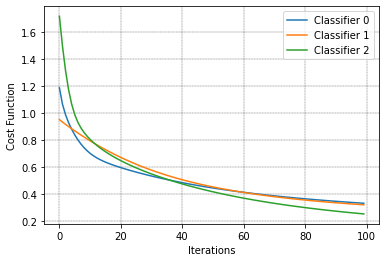

In [71]:
x1 = np.arange(100)
y1 = upd_0

x2 = np.arange(100)
y2 = upd_1

x3 = np.arange(100)
y3 = upd_2

plt.plot(x1, y1, label = 'Classifier 0')
plt.plot(x2, y2, label = 'Classifier 1')
plt.plot(x3, y3, label = 'Classifier 2')

plt.legend()
plt.xlabel("Iterations")
plt.ylabel("Cost Function")
plt.grid(axis = 'both', c = 'k', ls = '--', lw = 0.3)
plt.show()

In [72]:
h_train_all = np.concatenate([h_train_0, h_train_1, h_train_2], axis = 1)

In [73]:
h_train = np.zeros((len(h_train_all),1))

In [74]:
for i in range(len(h_train_all)):
    class0 = h_train_all[i,0]
    class1 = h_train_all[i,1]
    class2 = h_train_all[i,2]
    
    if(class0>=class1 and class0>=class2):
        h_train[i,0] = 0
    if(class1>=class0 and class1>=class2):
        h_train[i,0] = 1
    if(class2>=class0 and class2>=class1):
        h_train[i,0] = 2

### Confusion Matrix

$$
\large CM = \begin{bmatrix} 
TP & FP\\ 
FN & TN
\end{bmatrix} \\
Accuracy =  \frac {TP +TN}{TP + TN + FP + FN} \ \ \ \ Precision = \frac {TP}{TP + FP} \\ 
Recall = \frac {TP}{TP + FN} \ \ \ \ F_1 Score = \frac {2\cdot Precision \cdot Recall} {Precision + Recall}
$$ 

* Sensitivity or Recall is also called TP Rate
* FP Rate = (1 - specificty)

In [75]:
def confusionMatrix(h,y):

    TP = 0
    FP = 0
    TN = 0 
    FN = 0

    for i in range(len(h)):
        if(y[i]==0 and h[i]==0):
            TN = TN + 1
        if(y[i]==1 and h[i]==0):
            FN = FN + 1
        if(y[i]==0 and h[i]==1):
            FP = FP + 1
        if(y[i]==1 and h[i]==1):
            TP = TP + 1

    d = {'Output 1' : [TP,FN], 'Output 0' : [FP, TN]}
    CM = pd.DataFrame(data = d, index = ['Predicted 1', 'Predicted 0'])
    
    return CM

In [76]:
for i in range(len(h_train_0)):
    h_train_0[i] = 1 if h_train_0[i]>0.5 else 0
    h_train_1[i] = 1 if h_train_1[i]>0.5 else 0
    h_train_2[i] = 1 if h_train_2[i]>0.5 else 0

In [77]:
CM_train_0 = confusionMatrix(h_train_0, y_train_0)
CM_train_1 = confusionMatrix(h_train_1, y_train_1) 
CM_train_2 = confusionMatrix(h_train_2, y_train_2) 

In [78]:
CM_train_1

,Output 1,Output 0
Predicted 1,34,9
Predicted 0,2,41


## Prediction on Test Set

### Scaling and Transformation

In [79]:
for i in range(X_test_0.shape[1]):
    k = X_test_0.columns[i] 
    X_test_0.loc[:,k] = X_test_0.loc[:,k].apply( lambda x : ((x - np.mean(X_test_0.loc[:,k]))/np.var(X_test_0.loc[:,k])) )
    X_test_1.loc[:,k] = X_test_1.loc[:,k].apply( lambda x : ((x - np.mean(X_test_1.loc[:,k]))/np.var(X_test_1.loc[:,k])) )
    X_test_2.loc[:,k] = X_test_2.loc[:,k].apply( lambda x : ((x - np.mean(X_test_2.loc[:,k]))/np.var(X_test_2.loc[:,k])) )

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1951: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[selected_item_labels] = value


Inserting Bias Term :

In [80]:
X_test_0.insert(0, 'bias', np.ones((X_test_0.shape[0], 1)))
X_test_1.insert(0, 'bias', np.ones((X_test_1.shape[0], 1)))
X_test_2.insert(0, 'bias', np.ones((X_test_2.shape[0], 1)))

Resetting Index:

In [81]:
X_test_0.reset_index(drop = True, inplace = True); 
X_test_1.reset_index(drop = True, inplace = True); 
X_test_2.reset_index(drop = True, inplace = True); 

Arrays Initialisation to store results :

In [82]:
pred_0 = np.zeros((X_test_0.shape[0],1)) 
pred_1 = np.zeros((X_test_0.shape[0],1)) 
pred_2 = np.zeros((X_test_2.shape[0],1)) 

### Prediction

Final prediction:

In [83]:
pred_0 = prediction_mini(pred_0, X_test_0, theta_0)
pred_1 = prediction_mini(pred_1, X_test_1, theta_1)
pred_2 = prediction_mini(pred_2, X_test_2, theta_2)

## Model Evaluation

### Confusion Matrix

In [84]:
for i in range(len(pred_0)):
    pred_0[i] = 1 if pred_0[i]>0.5 else 0
    pred_1[i] = 1 if pred_1[i]>0.5 else 0
    pred_2[i] = 1 if pred_2[i]>0.5 else 0

In [85]:
CM_test_0 = confusionMatrix(pred_0, y_test_0)
CM_test_1 = confusionMatrix(pred_1, y_test_1) 
CM_test_2 = confusionMatrix(pred_2, y_test_2) 

Confusion Matrix for Classifier 0:

In [86]:
CM_test_0

,Output 1,Output 0
Predicted 1,14,2
Predicted 0,0,22


Confusion Matrix for Classifier 1:

In [87]:
CM_test_1

,Output 1,Output 0
Predicted 1,11,8
Predicted 0,3,16


Confusion Matrix for Classifier 2:

In [88]:
CM_test_2

,Output 1,Output 0
Predicted 1,10,3
Predicted 0,0,25


In [89]:
CM_test_2.loc['Predicted 1','Output 1']

10

### Accuracy, Precision, Recall, F1 Score

$$
Accuracy =  \frac {TP +TN}{TP + TN + FP + FN} \ \ \ \ Precision = \frac {TP}{TP + FP} \\ 
Recall = \frac {TP}{TP + FN} \ \ \ \ F_1 Score = \frac {2\cdot Precision \cdot Recall} {Precision + Recall}\\
Specificity = \frac{TN}{TN + FP}
$$ 

In [90]:
def aprf(df):
    TP = df.loc['Predicted 1','Output 1']
    FP = df.loc['Predicted 1','Output 0']
    FN = df.loc['Predicted 0','Output 1']
    TN = df.loc['Predicted 0','Output 0']
    
    accuracy =  (TP + TN)/(TP + FP + FN + TN)
    precision = (TP)/(TP + FP)
    recall = (TP)/(TP + FN)
    f1score = (2*precision*recall)/(precision + recall)
    sens = TP/(TP + FN)
    spec = TN/(TN + FP)
    d = {'Metrics':[accuracy, precision, recall, f1score, spec]}
    results = pd.DataFrame(data = d, index = ['Accuracy', 'Precision', 'Recall', 'F1-Score',  'Specificity'])
    
    return results

In [91]:
results_test_0 = aprf(CM_test_0)
results_test_1 = aprf(CM_test_1)
results_test_2 = aprf(CM_test_2)

For classifier 0:

In [92]:
results_test_0

,Metrics
Accuracy,0.947368
Precision,0.875000
Recall,1.000000
F1-Score,0.933333
Specificity,0.916667


For classifier 1:

In [93]:
results_test_1

,Metrics
Accuracy,0.710526
Precision,0.578947
Recall,0.785714
F1-Score,0.666667
Specificity,0.666667


For classifier 2:

In [94]:
results_test_2

,Metrics
Accuracy,0.921053
Precision,0.769231
Recall,1.000000
F1-Score,0.869565
Specificity,0.892857
